In [1]:
# ! pip install fiftyone

## Visualize images in RDD2022 for the ORDDC'2024 competition

In [2]:
import os
import fiftyone as fo
import fiftyone.zoo as foz

***Python 3.8 Deprecation Notice***
Python 3.8 will no longer be supported in new releases after October 1, 2024.
Please upgrade to Python 3.9 or later.
For additional details please see https://deprecation.voxel51.com


In [3]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir="rdd2022/coco_1kres_plus"

In [5]:
! tree -L 2 $dataset_dir

rdd2022/coco_1kres_plus
├── annotations
│   ├── histogram_coco4_rdd2022.json
│   ├── rdd2022_annotations.json
│   ├── rddd2022_annotation_svrdd_train_val_ext.json
│   ├── rdd_train.json
│   ├── rdd_val.json
│   ├── svrdd_train.json
│   ├── svrdd_val.json
│   ├── train.json
│   └── val.json
├── train
│   ├── images
│   └── images.txt
└── val
    ├── images
    └── images.txt

5 directories, 11 files


#### Load the dataset, using tags to mark the samples in each split

In [11]:
import time

# The type of the dataset being imported
dataset_type = fo.types.COCODetectionDataset  # for example

# The splits to load 
splits = ["train"] # "train", "val", 

In [12]:
# Name of the dataset in session
name = "export_coco_rdd2022" + str(time.time())
# Import the dataset
dataset = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |█████████████| 37224/37224 [46.0s elapsed, 0s remaining, 734.7 samples/s]      


In [16]:
print(dataset.summary())

Name:        export_coco_rdd20221725896319.5543778
Media type:  image
Num samples: 37224
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [17]:
print(dataset.stats())

{'samples_count': 37224, 'samples_bytes': 22271568, 'samples_size': '21.2MB', 'total_bytes': 22271568, 'total_size': '21.2MB'}


### Creates a session and opens the App in the output of the cell

***Python 3.8 Deprecation Notice***
Python 3.8 will no longer be supported in new releases after October 1, 2024.
Please upgrade to Python 3.9 or later.
For additional details please see https://deprecation.voxel51.com



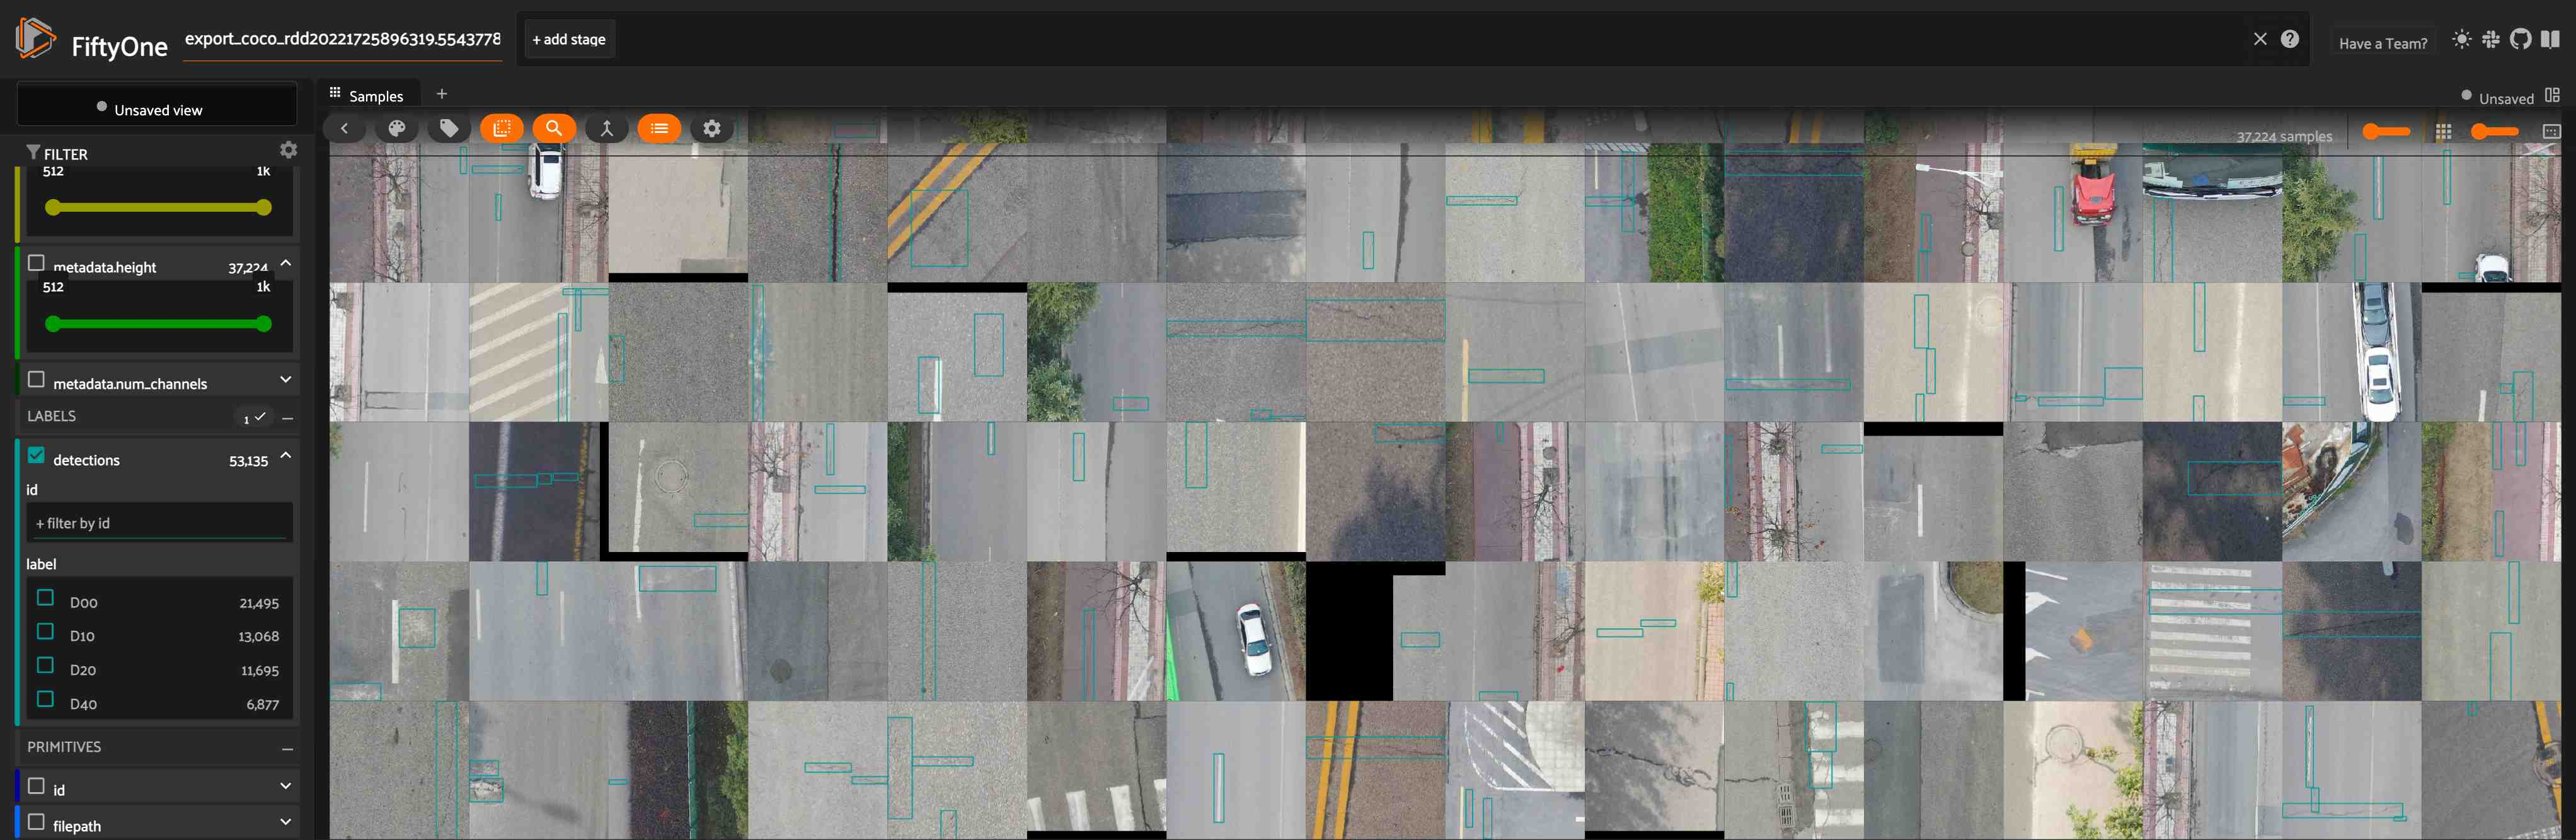

In [18]:
session = fo.launch_app(dataset)

In [19]:
# Replace active App instance with screenshot so App state is viewable offline
session.freeze()

### Another split of dataset with high resolution

In [21]:
dataset_4kres_dir="rdd2022/coco_4kres"
# Name of the dataset in session
name = "export_coco_rdd2022" + str(time.time())
# Import the dataset
dataset_4kres = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_4kres_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_4kres_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |███████████████| 2796/2796 [7.1s elapsed, 0s remaining, 345.6 samples/s]      


In [22]:
print(dataset_4kres.summary())

Name:        export_coco_rdd20221725896672.1150575
Media type:  image
Num samples: 2796
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)



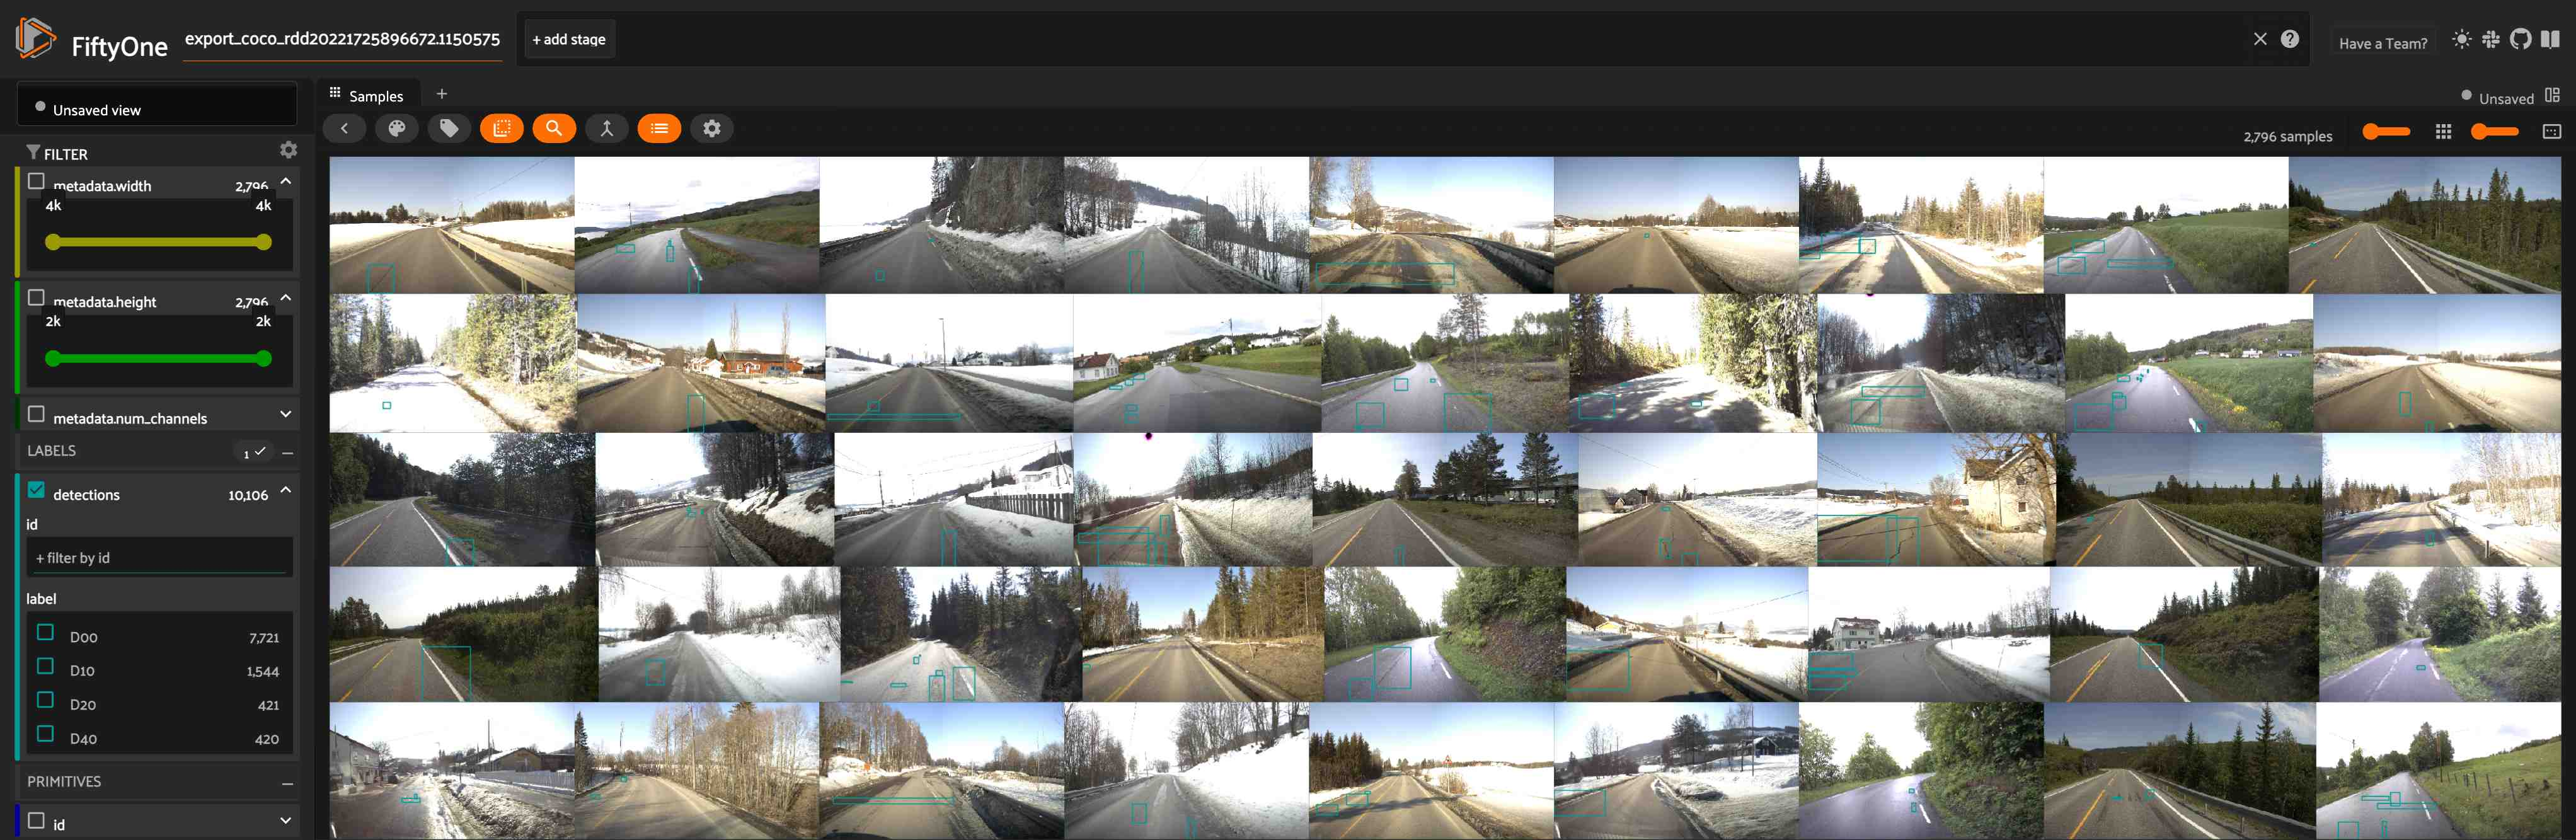

In [23]:
session_4k = fo.launch_app(dataset_4kres)

In [24]:
# Replace active App instance with screenshot so App state is viewable offline
session_4k.freeze()